In [18]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [4]:
#prepare data
N = 100
X = np.random.randn(N)
y = np.random.randn(N)

In [5]:
#関数化
def min_sq(X,y):
    X_mean = np.mean(X, dtype=np.float64)
    y_mean = np.mean(y, dtype=np.float64)
    denom = sum([(i - X_mean) * (j - y_mean)  for i, j in zip(X, y)])
    frac = sum([(i - X_mean) ** 2 for i in X])
    beta1 = denom / frac
    beta0 = y_mean - beta1 * X_mean
    
    return beta0, beta1

In [6]:
beta0, beta1 = min_sq(X, y)

In [9]:
beta0, beta1

(-0.03458157615496023, -0.05376715146991017)

In [13]:
RSS = np.linalg.norm(y - (beta1 * X + beta0))**2
RSE = np.sqrt(RSS/(N-2))
B0 = (X.T@X / N) / (np.linalg.norm(X - np.mean(X))**2)
B1 = 1 / (np.linalg.norm(X - np.mean(X))**2)
SE_b0 = RSE * np.sqrt(B0)
SE_b1 = RSE * np.sqrt(B1)
t_0 = beta0 / SE_b0
t_1 = beta1 / SE_b1

In [14]:
B0

0.010036280976868114

In [16]:
t_0, t_1

(-0.350340878813852, -0.5635812029838814)

In [20]:
p_0 = 2 * (1 - stats.t.cdf(np.abs(t_0), N-2))
p_1 = 2 * (1 - stats.t.cdf(np.abs(t_1), N-2))

In [21]:
beta0, SE_b0, t_0, p_0

(-0.03458157615496023,
 0.09870836732511193,
 -0.350340878813852,
 0.7268347786631515)

In [22]:
beta1, SE_b1, t_1, p_1

(-0.05376715146991017,
 0.09540266989963456,
 -0.5635812029838814,
 0.5743265314560859)

In [23]:
from sklearn.linear_model import LinearRegression

In [25]:
reg = LinearRegression()
reg.fit(X.reshape(-1,1), y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
reg.coef_, reg.intercept_

(array([[-0.05376715]]), array([-0.03458158]))

In [29]:
from statsmodels import api as sm

In [32]:
X_reg = np.hstack((np.ones((N, 1)), X.reshape(N,1)))

In [35]:
model = sm.OLS(y, X_reg)
res = model.fit()

In [36]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3176
Date:                Wed, 06 May 2020   Prob (F-statistic):              0.574
Time:                        14:48:54   Log-Likelihood:                -139.40
No. Observations:                 100   AIC:                             282.8
Df Residuals:                      98   BIC:                             288.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0346      0.099     -0.350      0.727      -0.230       0.161
x1            -0.0538      0.095     -0.564      0.574      -0.243       0.136
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.165
Skew:                           0.098   Prob(JB):                        0.921
Kurtosis:                       3.037   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 予測区間・信頼区間

In [38]:
#prepare data
N = 100
X = np.random.randn(N)
beta = np.array([1,1])
X_reg = np.hstack((np.ones((N, 1)), X.reshape(N,1)))
eps = np.random.randn(N)
y = X_reg @ beta + eps

In [40]:
beta_hat = np.linalg.inv(X_reg.T.dot(X_reg))@X_reg.T@y

In [42]:
beta_hat

array([0.90842677, 0.90484665])

In [41]:
RSS = np.linalg.norm(y - X_reg@beta_hat)**2
RSE = np.sqrt(RSS/(N-2))

In [59]:
U = np.linalg.inv(X_reg.T.dot(X_reg))

In [60]:
U

array([[ 0.0100141 , -0.0003467 ],
       [-0.0003467 ,  0.00852629]])

In [61]:
#区間計算用関数
def f(x, a):
    x = np.array([1,x])
    
    upper = x @ beta_hat + stats.t.ppf(0.975, df = N - 2) * RSE * np.sqrt(a + x @ U @ x.T)
    lower = x @ beta_hat - stats.t.ppf(0.975, df = N - 2) * RSE * np.sqrt(a + x @ U @ x.T)
    return upper, lower

In [62]:
x_seq = np.linspace(-10,10,400)

In [65]:
#信頼区間・予測区間
upper0, lower0 = [], []
upper1,lower1 = [], []
for i in x_seq:
    ret0 = f(i, 0)
    upper0.append(ret0[0])
    lower0.append(ret0[1])
    ret1 = f(i,1)
    upper1.append(ret1[0])
    lower1.append(ret1[1])

In [64]:
yy = beta_hat[0] + beta_hat[1] * x_seq

In [67]:
upper0

[-6.455134757324223,
 -6.418093501815717,
 -6.38105176181182,
 -6.344009530032697,
 -6.306966799052376,
 -6.269923561295076,
 -6.232879809031424,
 -6.195835534374547,
 -6.15879072927606,
 -6.121745385521924,
 -6.084699494728174,
 -6.04765304833651,
 -6.0106060376097705,
 -5.973558453627238,
 -5.936510287279816,
 -5.8994615292650545,
 -5.86241217008199,
 -5.8253622000258645,
 -5.788311609182632,
 -5.751260387423316,
 -5.714208524398176,
 -5.677156009530674,
 -5.6401028320112605,
 -5.603048980790944,
 -5.565994444574635,
 -5.528939211814307,
 -5.49188327070189,
 -5.454826609161935,
 -5.417769214844041,
 -5.380711075115016,
 -5.34365217705076,
 -5.306592507427893,
 -5.269532052715061,
 -5.232470799063969,
 -5.195408732300082,
 -5.158345837913,
 -5.1212821010465,
 -5.08421750648821,
 -5.047152038658931,
 -5.010085681601556,
 -4.97301841896959,
 -4.935950234015272,
 -4.898881109577225,
 -4.861811028067682,
 -4.824739971459223,
 -4.787667921271017,
 -4.750594858554543,
 -4.71352076387879,
 -

In [68]:
lower0

[-9.824944647303102,
 -9.771274459504975,
 -9.71760475620224,
 -9.663935544674729,
 -9.610266832348419,
 -9.556598626799085,
 -9.502930935756106,
 -9.449263767106352,
 -9.395597128898205,
 -9.341931029345705,
 -9.288265476832825,
 -9.234600479917853,
 -9.180936047337962,
 -9.127272188013864,
 -9.07360891105465,
 -9.01994622576278,
 -8.96628414163921,
 -8.912622668388705,
 -8.858961815925307,
 -8.805301594377989,
 -8.751642014096497,
 -8.697983085657363,
 -8.644324819870143,
 -8.590667227783833,
 -8.537010320693506,
 -8.4833541101472,
 -8.429698607952986,
 -8.376043826186308,
 -8.322389777197566,
 -8.26873647361996,
 -8.215083928377583,
 -8.16143215469382,
 -8.107781166100017,
 -8.054130976444476,
 -8.00048159990173,
 -7.946833050982178,
 -7.893185344542049,
 -7.839538495793704,
 -7.7858925203163505,
 -7.732247434067094,
 -7.678603253392425,
 -7.624959995040112,
 -7.571317676171526,
 -7.517676314374435,
 -7.464035927676262,
 -7.410396534557836,
 -7.356758153967674,
 -7.303120805336796,


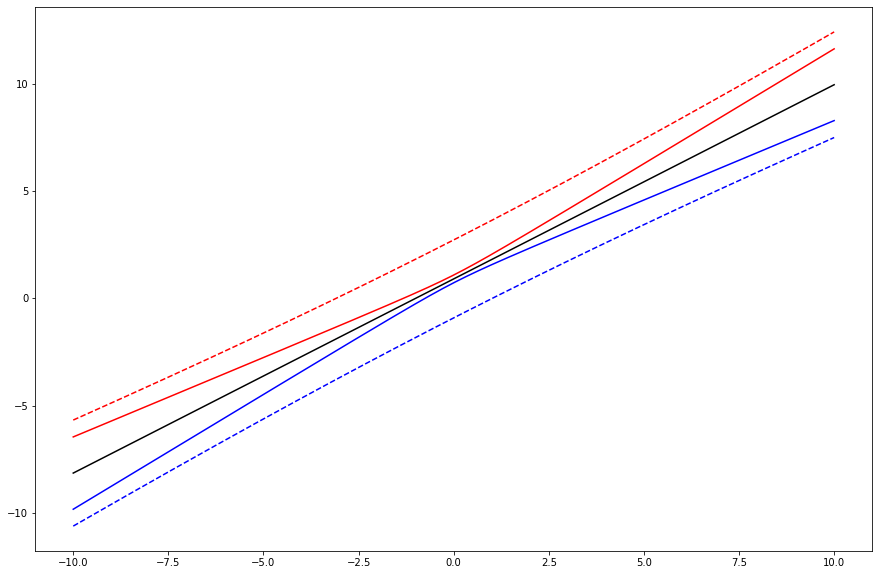

In [70]:
fig , ax = plt.subplots(figsize=(15,10))
ax.plot(x_seq, upper0,  c = "red")
ax.plot(x_seq, upper1, linestyle = "--", c = "red")
ax.plot(x_seq, lower0,  c = "blue")
ax.plot(x_seq, lower1, linestyle = "--", c = "blue")
ax.plot(x_seq, yy, c = "black")
plt.show()